In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:

dataset2 = pd.read_csv('/content/drive/MyDrive/dataset_2.csv')


In [ ]:
dataset2

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
dataset2.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [ ]:
dataset2.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [ ]:

dataset2.drop_duplicates(inplace=True)

dataset2.dropna(inplace=True)


In [ ]:
dataset2

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
dataset2['DateTime'] = pd.to_datetime(dataset2['DateTime'])

# Extract features from DateTime
dataset2['Date'] = dataset2['DateTime'].dt.date
dataset2['Time'] = dataset2['DateTime'].dt.time
dataset2['Year'] = dataset2['DateTime'].dt.year
dataset2['Month'] = dataset2['DateTime'].dt.month
dataset2['Day'] = dataset2['DateTime'].dt.day
dataset2['Hour'] = dataset2['DateTime'].dt.hour
dataset2['DayOfWeek'] = dataset2['DateTime'].dt.dayofweek

In [ ]:
dataset2

,DateTime,Junction,Vehicles,ID,Date,Time,Year,Month,Day,Hour,DayOfWeek
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00:00:00,2015,11,1,0,6
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01:00:00,2015,11,1,1,6
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02:00:00,2015,11,1,2,6
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03:00:00,2015,11,1,3,6
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04:00:00,2015,11,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017-06-30,19:00:00,2017,6,30,19,4
48116,2017-06-30 20:00:00,4,30,20170630204,2017-06-30,20:00:00,2017,6,30,20,4
48117,2017-06-30 21:00:00,4,16,20170630214,2017-06-30,21:00:00,2017,6,30,21,4
48118,2017-06-30 22:00:00,4,22,20170630224,2017-06-30,22:00:00,2017,6,30,22,4


In [ ]:
indian_holidays2 = holidays.India(years=dataset2['Year'].unique())


def is_holiday_in_india(date):
    return date in indian_holidays2

dataset2['IsHoliday'] = dataset2['Date'].apply(lambda x: is_holiday_in_india(x))


In [ ]:
dataset2 = dataset2.drop(columns = ['ID','DateTime'])

In [ ]:
dataset2

,Junction,Vehicles,Date,Time,Year,Month,Day,Hour,DayOfWeek,IsHoliday
0,1,15,2015-11-01,00:00:00,2015,11,1,0,6,False
1,1,13,2015-11-01,01:00:00,2015,11,1,1,6,False
2,1,10,2015-11-01,02:00:00,2015,11,1,2,6,False
3,1,7,2015-11-01,03:00:00,2015,11,1,3,6,False
4,1,9,2015-11-01,04:00:00,2015,11,1,4,6,False
...,...,...,...,...,...,...,...,...,...,...
48115,4,11,2017-06-30,19:00:00,2017,6,30,19,4,False
48116,4,30,2017-06-30,20:00:00,2017,6,30,20,4,False
48117,4,16,2017-06-30,21:00:00,2017,6,30,21,4,False
48118,4,22,2017-06-30,22:00:00,2017,6,30,22,4,False


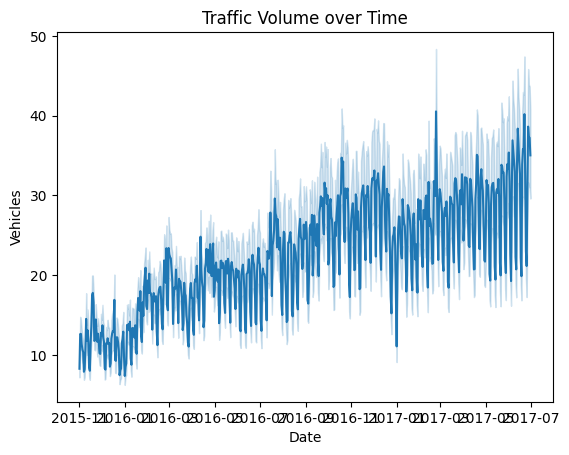

In [ ]:

sns.lineplot(data=dataset2, x="Date", y="Vehicles")
plt.xlabel("Date")
plt.ylabel("Vehicles")
plt.title("Traffic Volume over Time")
plt.show()


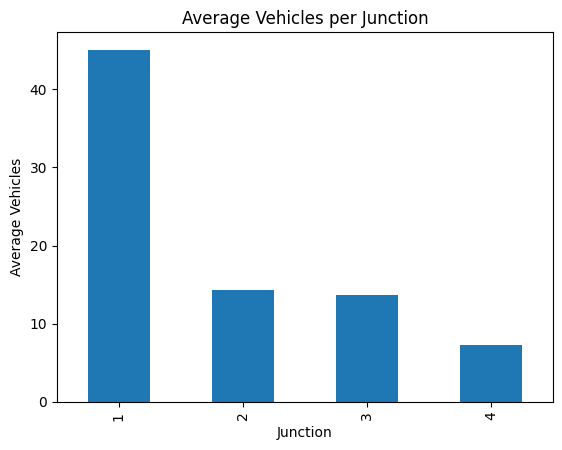

In [ ]:


dataset2.groupby('Junction')['Vehicles'].mean().plot(kind='bar')
plt.xlabel("Junction")
plt.ylabel("Average Vehicles")
plt.title("Average Vehicles per Junction")
plt.show()


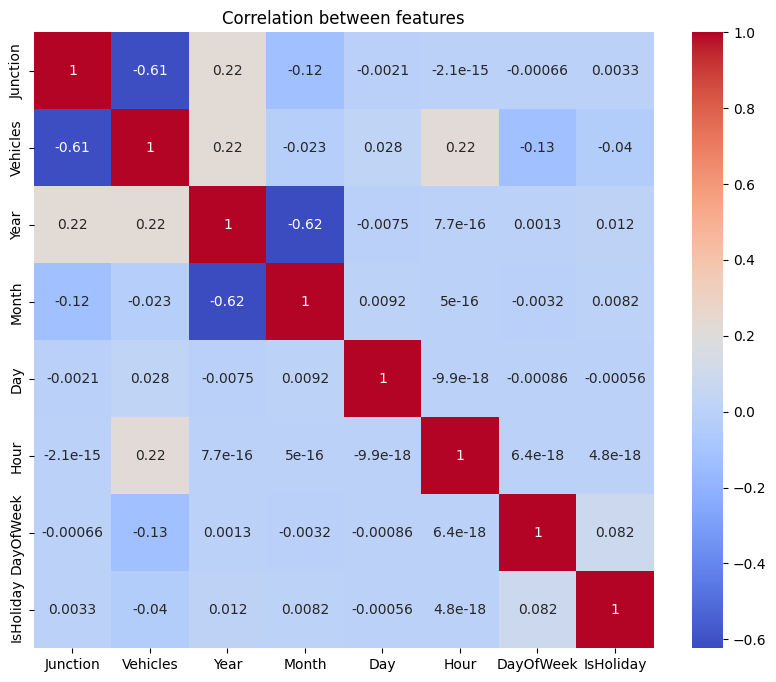

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset2.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between features")
plt.show()

In [ ]:

from scipy import stats


null_hypothesis = "There is no significant difference in the mean number of vehicles between weekdays and weekends."
alternative_hypothesis = "There is a significant difference in the mean number of vehicles between weekdays and weekends."

# Extract weekdays and weekends from the dataset
weekdays = dataset2[dataset2['DayOfWeek'].isin([0, 1, 2, 3, 4])]
weekends = dataset2[dataset2['DayOfWeek'].isin([5, 6])]

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(weekdays['Vehicles'], weekends['Vehicles'])

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis:", alternative_hypothesis)
else:
    print("Fail to reject the null hypothesis:", null_hypothesis)


Reject the null hypothesis: There is a significant difference in the mean number of vehicles between weekdays and weekends.


In [ ]:
 # Create lag features for previous day, week, and month
dataset2['Vehicles_lag_day'] = dataset2['Vehicles'].shift(24)
dataset2['Vehicles_lag_week'] = dataset2['Vehicles'].shift(24 * 7)
dataset2['Vehicles_lag_month'] = dataset2['Vehicles'].shift(24*7* 30)

# Drop rows with missing values due to the lag features
dataset2.isnull().sum()
dataset2

,Junction,Vehicles,Date,Time,Year,Month,Day,Hour,DayOfWeek,IsHoliday,Vehicles_lag_day,Vehicles_lag_week,Vehicles_lag_month
0,1,15,2015-11-01,00:00:00,2015,11,1,0,6,False,NaN,NaN,NaN
1,1,13,2015-11-01,01:00:00,2015,11,1,1,6,False,NaN,NaN,NaN
2,1,10,2015-11-01,02:00:00,2015,11,1,2,6,False,NaN,NaN,NaN
3,1,7,2015-11-01,03:00:00,2015,11,1,3,6,False,NaN,NaN,NaN
4,1,9,2015-11-01,04:00:00,2015,11,1,4,6,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48115,4,11,2017-06-30,19:00:00,2017,6,30,19,4,False,9.0,17.0,25.0
48116,4,30,2017-06-30,20:00:00,2017,6,30,20,4,False,13.0,17.0,22.0
48117,4,16,2017-06-30,21:00:00,2017,6,30,21,4,False,12.0,10.0,20.0
48118,4,22,2017-06-30,22:00:00,2017,6,30,22,4,False,15.0,10.0,17.0


In [ ]:
dataset2.isnull().sum()

Junction                 0
Vehicles                 0
Date                     0
Time                     0
Year                     0
Month                    0
Day                      0
Hour                     0
DayOfWeek                0
IsHoliday                0
Vehicles_lag_day        24
Vehicles_lag_week      168
Vehicles_lag_month    5040
dtype: int64

In [ ]:
dataset2['Vehicles_lag_day'].fillna(0,inplace = True)
dataset2['Vehicles_lag_week'].fillna(0,inplace = True)
dataset2['Vehicles_lag_month'].fillna(0,inplace = True)
dataset2

,Junction,Vehicles,Date,Time,Year,Month,Day,Hour,DayOfWeek,IsHoliday,Vehicles_lag_day,Vehicles_lag_week,Vehicles_lag_month
0,1,15,2015-11-01,00:00:00,2015,11,1,0,6,False,0.0,0.0,0.0
1,1,13,2015-11-01,01:00:00,2015,11,1,1,6,False,0.0,0.0,0.0
2,1,10,2015-11-01,02:00:00,2015,11,1,2,6,False,0.0,0.0,0.0
3,1,7,2015-11-01,03:00:00,2015,11,1,3,6,False,0.0,0.0,0.0
4,1,9,2015-11-01,04:00:00,2015,11,1,4,6,False,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48115,4,11,2017-06-30,19:00:00,2017,6,30,19,4,False,9.0,17.0,25.0
48116,4,30,2017-06-30,20:00:00,2017,6,30,20,4,False,13.0,17.0,22.0
48117,4,16,2017-06-30,21:00:00,2017,6,30,21,4,False,12.0,10.0,20.0
48118,4,22,2017-06-30,22:00:00,2017,6,30,22,4,False,15.0,10.0,17.0


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataset2, test_size=0.2, shuffle=False)

# Printing the sizes of the training and testing sets
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 38496
Testing set size: 9624


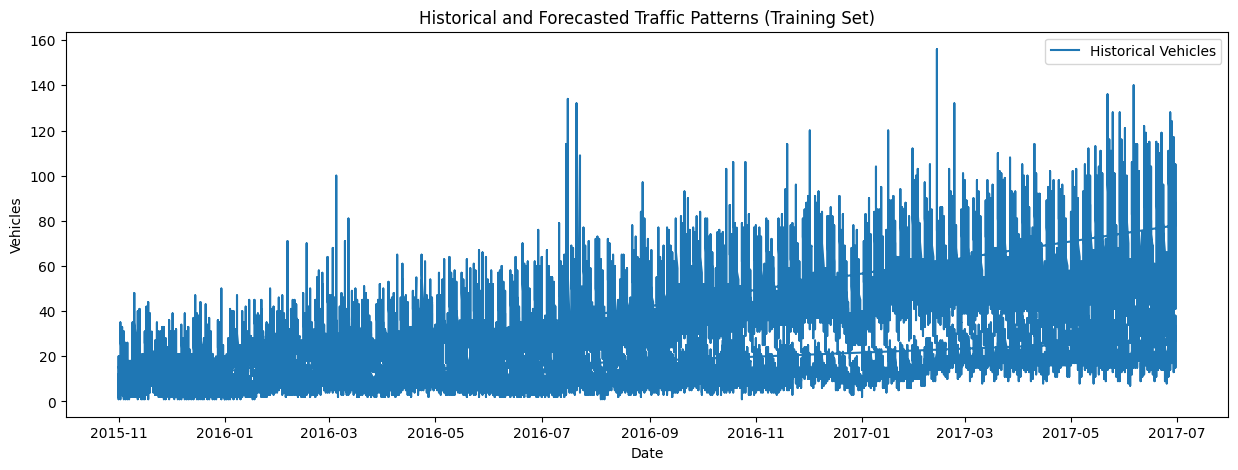

In [ ]:


plt.figure(figsize=(15, 5))
plt.plot(train_df['Date'], train_df['Vehicles'], label='Historical Vehicles')
#plt.plot(train_df['Date'], train_df['Vehicles_lag_day'], label='Lagged Vehicles (1 day)')
#plt.plot(train_df['Date'], train_df['Vehicles_lag_week'], label='Lagged Vehicles (1 week)')
#plt.plot(train_df['Date'], train_df['Vehicles_lag_month'], label='Lagged Vehicles (1 month)')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.title('Historical and Forecasted Traffic Patterns (Training Set)')
plt.legend()
plt.show()


In [ ]:
X = dataset2.drop(columns=[ 'Vehicles','Time','Date'])
y = dataset2['Vehicles']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Initialize models
models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SupportVectorRegressor': SVR(),
    'XGBoostRegressor': xgb.XGBRegressor(n_estimators=100, random_state=42)
}


results = {}
for model_name, model in models.items():
    mse, r2 = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    results[model_name] = {'MSE': mse, 'R²': r2}


results_df = pd.DataFrame(results).T
print(results_df)


best_model_name = results_df['R²'].idxmax()
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

                                  MSE        R²
RandomForestRegressor       23.407134  0.942566
LinearRegression            44.818202  0.890029
GradientBoostingRegressor   30.579604  0.924967
SupportVectorRegressor     150.240907  0.631353
XGBoostRegressor            21.724491  0.946694
Best Model: XGBoostRegressor


In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the LSTM model
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Convert X_train to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the LSTM model
lstm_mse = mean_squared_error(y_test, lstm_model.predict(X_test))
lstm_r2 = r2_score(y_test, lstm_model.predict(X_test))

# Define the sequential model
sequential_model = Sequential()
sequential_model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
sequential_model.add(Dense(50, activation='relu'))
sequential_model.add(Dense(1))

# Compile the sequential model
sequential_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the sequential model
sequential_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the sequential model
sequential_mse = mean_squared_error(y_test, sequential_model.predict(X_test))
sequential_r2 = r2_score(y_test, sequential_model.predict(X_test))

# Print the results
print(f"LSTM Model MSE: {lstm_mse}, R²: {lstm_r2}")
print(f"Sequential Model MSE: {sequential_mse}, R²: {sequential_r2}")


Epoch 1/10
1203/1203 [==============================] - 19s 12ms/step - loss: 321.9638
Epoch 2/10
1203/1203 [==============================] - 14s 12ms/step - loss: 83.1866
Epoch 3/10
1203/1203 [==============================] - 14s 12ms/step - loss: 47.9136
Epoch 4/10
1203/1203 [==============================] - 14s 12ms/step - loss: 39.6118
Epoch 5/10
1203/1203 [==============================] - 14s 12ms/step - loss: 37.0130
Epoch 6/10
1203/1203 [==============================] - 14s 12ms/step - loss: 35.7573
Epoch 7/10
1203/1203 [==============================] - 13s 11ms/step - loss: 35.1849
Epoch 8/10
1203/1203 [==============================] - 14s 12ms/step - loss: 34.4044
Epoch 9/10
1203/1203 [==============================] - 14s 11ms/step - loss: 34.0993
Epoch 10/10
301/301 [==============================] - 2s 6ms/step
Epoch 1/10
1203/1203 [==============================] - 3s 2ms/step - loss: 439.6305
Epoch 2/10
1203/1203 [==============================] - 2s 2ms/step - los

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, lstm_model.predict(X_test))
mse = mean_squared_error(y_test, lstm_model.predict(X_test))
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


301/301 [==============================] - 1s 4ms/step
Mean Absolute Error (MAE): 3.4429288777032694
Mean Squared Error (MSE): 30.72989940821061
Root Mean Squared Error (RMSE): 5.543455547599404


301/301 [==============================] - 0s 1ms/step


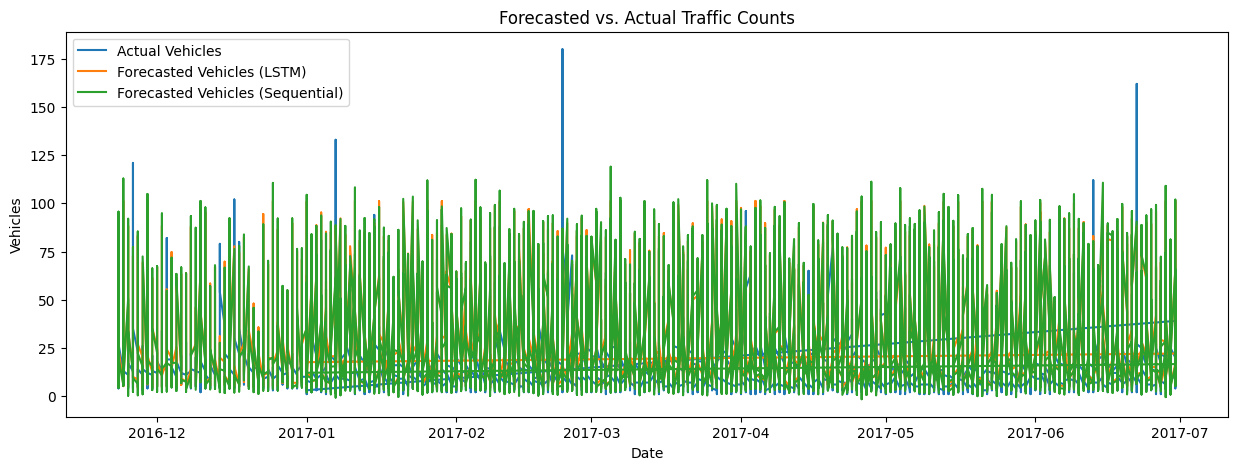

301/301 [==============================] - 0s 1ms/step


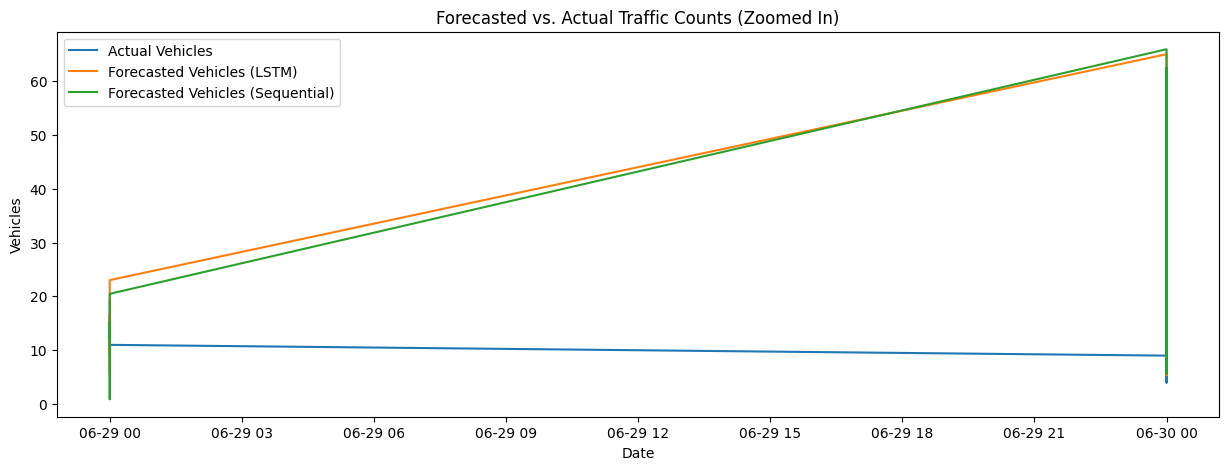

In [ ]:

# Plotting the Forecasted vs. Actual Traffic Counts

# Plot the forecasted and actual traffic counts
plt.figure(figsize=(15, 5))
plt.plot(test_df['Date'], test_df['Vehicles'], label='Actual Vehicles')
plt.plot(test_df['Date'], lstm_model.predict(X_test), label='Forecasted Vehicles (LSTM)')
plt.plot(test_df['Date'], sequential_model.predict(X_test), label='Forecasted Vehicles (Sequential)')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.title('Forecasted vs. Actual Traffic Counts')
plt.legend()
plt.show()

# Zoom in on a specific period
plt.figure(figsize=(15, 5))
plt.plot(test_df['Date'][-30:], test_df['Vehicles'][-30:], label='Actual Vehicles')
plt.plot(test_df['Date'][-30:], lstm_model.predict(X_test)[-30:], label='Forecasted Vehicles (LSTM)')
plt.plot(test_df['Date'][-30:], sequential_model.predict(X_test)[-30:], label='Forecasted Vehicles (Sequential)')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.title('Forecasted vs. Actual Traffic Counts (Zoomed In)')
plt.legend()
plt.show()


In [ ]:

# Design a Robust Traffic Management System
# Designing a dynamic traffic management system that adapts to peak traffic hours and efficiently handles the increased load during those hours.

# Create a function to identify peak traffic hours
def identify_peak_hours(traffic_data):
    # Calculate the average traffic volume for each hour of the day
    hourly_averages = traffic_data.groupby('Hour')['Vehicles'].mean()

    # Identify the hours with the highest average traffic volume
    peak_hours = hourly_averages.sort_values(ascending=False).index[:3]

    return peak_hours

# Apply the function to the dataset
peak_hours = identify_peak_hours(dataset2)
peak_hours
# Implement dynamic traffic management strategies during peak hours
# - Increase the number of traffic lanes
# - Implement adaptive traffic signal timing
# - Encourage carpooling and public transportation
# - Provide real-time traffic updates to drivers
# - Use variable message signs to inform drivers about traffic conditions and alternative routes

# Monitor the effectiveness of the implemented strategies
# - Collect traffic data during peak hours
# - Analyze the data to measure the impact of the strategies on traffic flow, congestion, and travel times
# - Make adjustments to the strategies as needed



Index([19, 20, 12], dtype='int32', name='Hour')

In [ ]:
# prompt: convert it into a package using pickle

import pickle

# Train the best model (e.g., LSTM model)
best_model = lstm_model

# Save the trained model to a file using pickle
with open('traffic_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Load the saved model from the file
with open('traffic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)



301/301 [==============================] - 3s 6ms/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
